# 보스턴 주택 가격 데이터셋 회귀 분석

이 노트북은 보스턴 주택 가격 데이터셋을 사용하여 회귀 모델을 구축하고 평가하는 과정을 보여줍니다. 단계는 데이터 로드, 전처리, 모델 생성, 학습, 평가 및 결과 시각화를 포함합니다.


In [9]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing

# 폰트 맑은 고딕으로 바꾸기
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

# 보스턴 주택 가격 데이터셋 불러오기
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

# 학습 및 테스트 샘플 수 출력
print(f"학습 샘플 수: {len(train_X)}")
print(f"테스트 샘플 수: {len(test_X)}")

# 첫 번째 학습 데이터와 목표 출력
print(f"첫 번째 학습 샘플: {train_X[0]}")
print(f"첫 번째 학습 목표: {train_Y[0]}")


학습 샘플 수: 404
테스트 샘플 수: 102
첫 번째 학습 샘플: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
첫 번째 학습 목표: 15.2


## 데이터 전처리 (정규화)

특징 및 목표를 정규화하여 평균이 0이고 분산이 1이 되도록 합니다.


In [10]:
# 특징 정규화
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std

# 목표 정규화
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

# 첫 번째 정규화된 학습 샘플 및 목표 출력
print(f"첫 번째 정규화된 학습 샘플: {train_X[0]}")
print(f"첫 번째 정규화된 학습 목표: {train_Y[0]}")


첫 번째 정규화된 학습 샘플: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
첫 번째 정규화된 학습 목표: -0.7821526033779157


## 회귀 모델 생성

세 개의 은닉층을 갖는 TensorFlow Keras 회귀 모델을 구축합니다.


In [13]:
# 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

# 모델 요약 출력
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 52)             │           728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 39)             │         2,067 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 26)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,862 (15.09 KB)

 Non-trainable params: 0 (0.00 B)

## 활성화 함수 비교 시각화

sigmoid, tanh 및 ReLU 활성화 함수의 차이점을 시각화합니다.


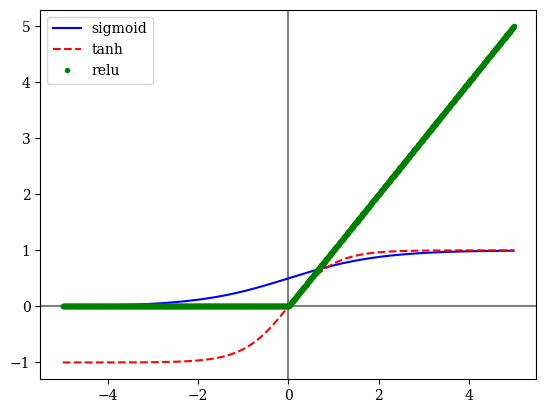

In [14]:
# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# x 값 범위 정의
x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

# 활성화 함수 시각화
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

# 학습시키지 않은 데이터로 val_acc

## 회귀 모델 학습

회귀 모델을 학습시킵니다.


In [15]:
# 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2876 - val_loss: 1.1245
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5505 - val_loss: 0.8512
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4854 - val_loss: 0.4941
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3209 - val_loss: 0.5279
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3062 - val_loss: 0.3977
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2946 - val_loss: 0.5221
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2527 - val_loss: 0.3360
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1466 - val_loss: 0.2142
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1957 - val_loss: 0.3110
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1792 - val_loss: 0.1381
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1158 - val_loss: 0.1964
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1254 - val_lo

## 회귀 모델 학습 결과 시각화

학습 손실 및 검증 손실을 시각화합니다.


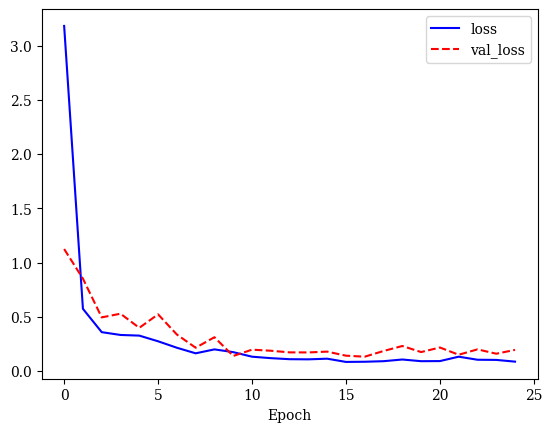

In [16]:
# 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## 회귀 모델 평가

테스트 데이터셋을 사용하여 모델을 평가합니다.


In [17]:
# 모델 평가
model.evaluate(test_X, test_Y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.1604


0.21114042401313782

## 실제 주택 가격과 예측 주택 가격 시각화

테스트 데이터셋에서 실제 주택 가격과 모델이 예측한 주택 가격을 시각화합니다.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


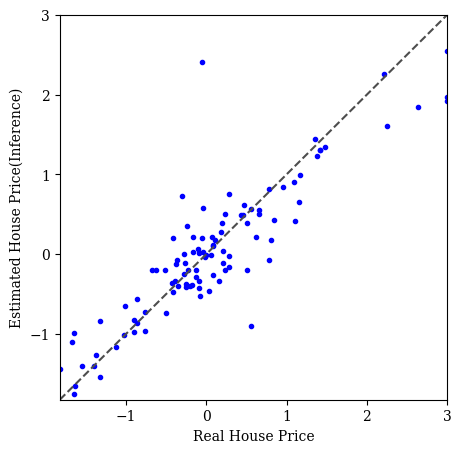

In [18]:
# 예측 수행
pred_Y = model.predict(test_X)

# 실제 주택 가격과 예측 주택 가격 시각화
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
# plt.xlabel('실제 주택 가격')
plt.xlabel('Real House Price')
plt.ylabel('Estimated House Price(Inference)')
plt.show()


## 모델 재정의 및 학습

초기 중지 콜백을 사용하여 모델을 재정의하고 학습시킵니다.


In [20]:
# 모델 재정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

# 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8429 - val_loss: 1.0049
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5682 - val_loss: 0.3966
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2885 - val_loss: 0.3222
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1741 - val_loss: 0.2090
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1740 - val_loss: 0.2231
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1541 - val_loss: 0.1694
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0956 - val_loss: 0.1600
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1322 - val_loss: 0.1902
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1379 - val_loss: 0.1837
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1147 - val_loss: 0.1363
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0860 - val_loss: 0.1283
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0847 - val_lo

## 회귀 모델 학습 결과 시각화 (재학습 후)

재학습 후 학습 손실 및 검증 손실을 시각화합니다.

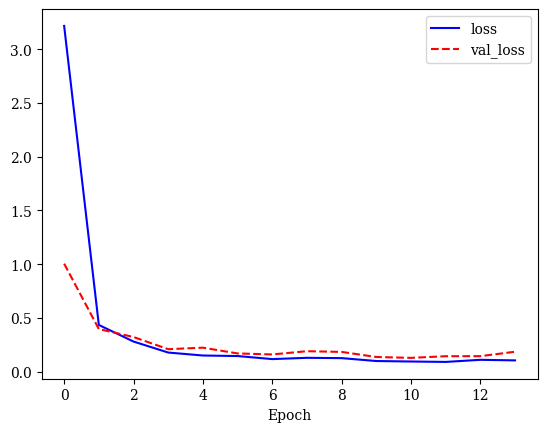

In [21]:
# 학습 결과 시각화 (재학습 후)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## 회귀 모델 평가 (재학습 후)

테스트 데이터셋을 사용하여 재학습한 모델을 평가합니다.


In [22]:
# 모델 평가 (재학습 후)
model.evaluate(test_X, test_Y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.2172


0.30404409766197205

## 실제 주택 가격과 예측 주택 가격 시각화 (재학습 후)

재학습한 모델의 테스트 데이터셋에서 실제 주택 가격과 예측 주택 가격을 시각화합니다.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


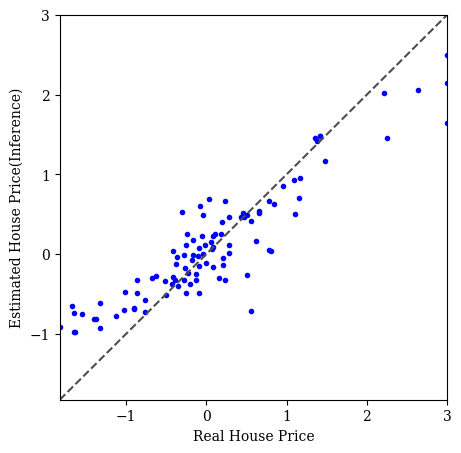

In [23]:
# 예측 수행 (재학습 후)
pred_Y = model.predict(test_X)

# 실제 주택 가격과 예측 주택 가격 시각화 (재학습 후)
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('Real House Price')
plt.ylabel('Estimated House Price(Inference)')
plt.show()
